# CIS 678 Project 1
### 1. Pre-processing: read in and process the data
I chose to use a space as a delimiter for the split() method, and used strip() to remove /n characters. This should leave me with only letters, numbers and special characters. 

My definition of a syllable includes the exception to the "vowel following a consonant" Rule, as well as the "vowel at the beginning of a word" rule. 

In [21]:
def syllable_count_function(content):
    numSyllables = 0
    vowels = "aeiouy"
    for word in content.split(" "):
        word = word.lower()
        word = word.strip()
                #Rule 1: vowel at start of word
        if word[0] in vowels:
            numSyllables +=1
                #Rule 2: vowel following consonant...
        
        for i in range(1, len(word)):
            if word[i-1] not in vowels and word[i] in vowels:
                
                numSyllables +=1
                        #exception to Rule 2: other than "the", a lone 'e'
                        #does not constitute a syllable
                if word.endswith("e") and word != "the":
                    numSyllables -=1

    return numSyllables

def word_count_function(content):
    numWords = 0
    for word in content.split(" "):
        word = word.lower()
        numWords +=1
    return numWords

def sentence_count_function(content):
    numSentences = 0
    for word in content.split(" "):
        word = word.lower()
        if word.endswith(('.', '?', '!')):
            numSentences +=1
    return numSentences


### 2. Analysis: compute the Flesch Index of your data

In [22]:
#computing score using our variables
def flesch_index_calculator(file_name):
    #count syllables, words and sentences in a document
    numSyllables = syllable_count_function(content)
    numWords = word_count_function(content)
    numSentences = sentence_count_function(content)
    #in order to calculate the flesch index
    flesch_index = 206.835 - 84.6*(numSyllables/numWords) - 1.015*(numWords/numSentences)
    return flesch_index

file_name = input("input the file name you would like to count:")
with open(file_name, "r") as file:
    content = file.read()
    flesch_index_calculator(content)
    

### 3. Visualization: display the data/results

Let's look at how many syllables per word each document had.

I was unable to get GettysburgAddress.txt to work with my syllable_count_function so I compared a bit of Shakespeare from Romeo and Juliet. 

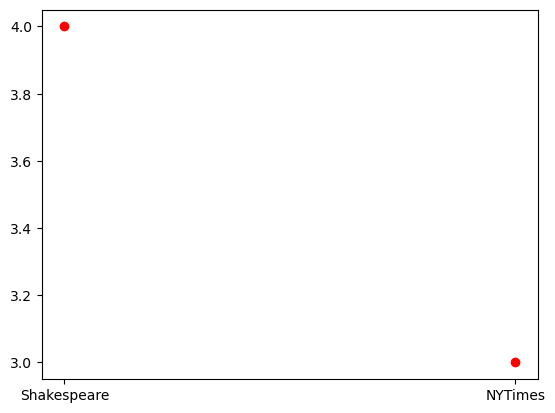

In [23]:
import matplotlib.pyplot as plt
#define names
names = ['Shakespeare','NYTimes']
#create values to plot showing our statistic of interest
syl_per_word_shake = syllable_count_function("Shakespeare.txt")/word_count_function("Shakespeare.txt")
syl_per_word_NYT = syllable_count_function("NYTimes.txt")/word_count_function("NYTimes.txt")
plt.plot(names,[syl_per_word_shake, syl_per_word_NYT],'ro')

plt.show()

### 4. Experimentation: what does the data tell you?

Microsoft Word's wordcount says that the NYTimes article has 807 words while mine says that it has 793, demonstrating a difference in calculations. Though these are close of course, it is likely due to an error in my method of counting words. 

Shakespeare has a reputation as being hard to read. Is it actually hard to read compared to these
other documents? (According to the Flesch Index?) It seems like it, this has the lowest flesch index so far (hardest to read).

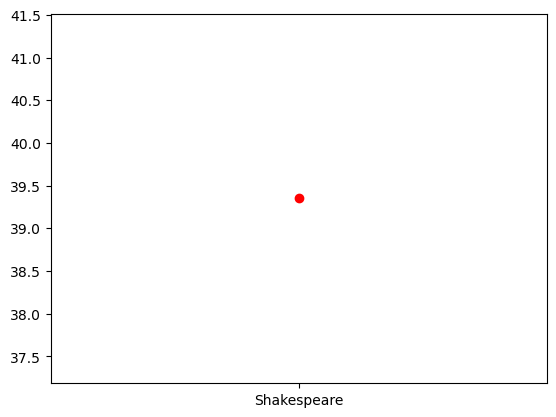

In [24]:
names = ['Shakespeare']
flesch_index_shake = flesch_index_calculator("Shakespeare.txt")

plt.plot(names,[flesch_index_shake],'ro')

plt.show()
